In [1]:
import cv2

In [2]:
import numpy as np
from scipy import misc
i = misc.ascent()

In [6]:
import matplotlib.pyplot as plt

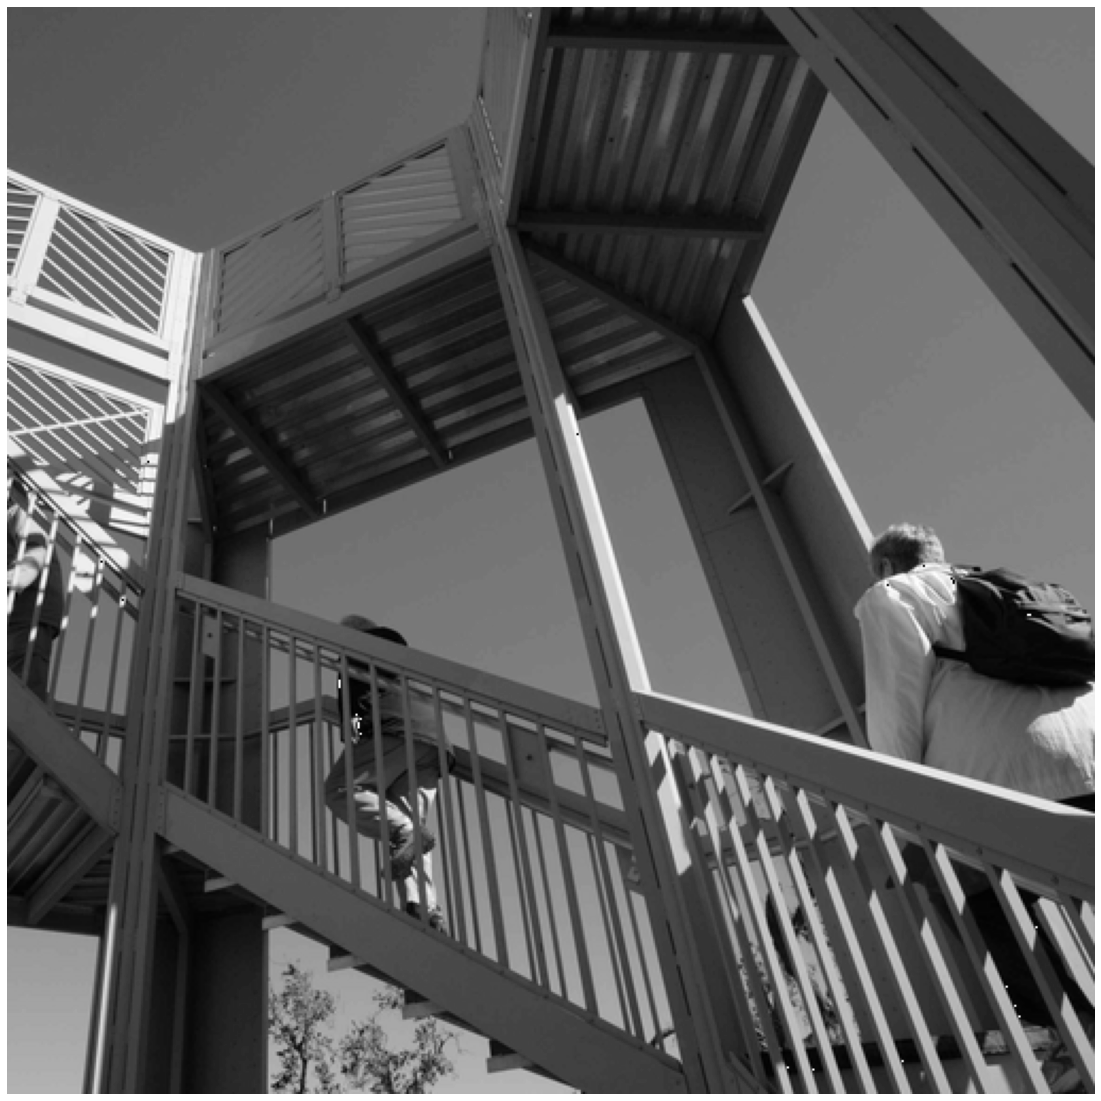

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20)) # source: https://stackoverflow.com/a/10541486
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [18]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [66]:
filter_a = [
    [-1,-2, -1],
    [0,  0,  0],
    [1,  2,  1]
]


In [64]:
filter_b = [
    [0,  1, 0], 
    [1, -4, 1],
    [0,  1, 0]
]

In [41]:
filter_c = [ 
    [-1, 0, 1], 
    [-2, 0, 2], 
    [-1, 0, 1]
]

In [67]:
applied_filter = filter_a

In [68]:
weight = 1

In [69]:
# applying filter by convolution
for x in range(1,size_x-1): # traversing x axis
    for y in range(1, size_y-1): # traversing y axis
        # one convolution
        convolution = 0.0
        # calculate on image pixels at index 00,01,02 (first convolution)
        convolution = convolution + (i [ x - 1, y - 1] * applied_filter[0][0])
        convolution = convolution + (i [ x    , y - 1] * applied_filter[0][1])
        convolution = convolution + (i [ x + 1, y - 1] * applied_filter[0][2])
        
        # calculate on image pixels at index 10,11,12 (first convolution)
        convolution = convolution + (i [ x - 1, y    ] * applied_filter[1][0])
        convolution = convolution + (i [ x    , y    ] * applied_filter[1][1])
        convolution = convolution + (i [ x + 1, y    ] * applied_filter[1][2])
        
        # calculate on image pixels at index 20,21,22 (first convolution)
        convolution = convolution + (i [ x - 1, y - 1] * applied_filter[2][0])
        convolution = convolution + (i [ x    , y - 1] * applied_filter[2][1])
        convolution = convolution + (i [ x + 1, y - 1] * applied_filter[2][2])
        
        # relu (if max wasn't capped at 255.)
        # 255 since thats the maximum intensity or strength (range 0-255)
        if convolution<0:
            convolution=0
        if convolution>255:
            convolution=255
        i_transformed[x,y] = convolution
        

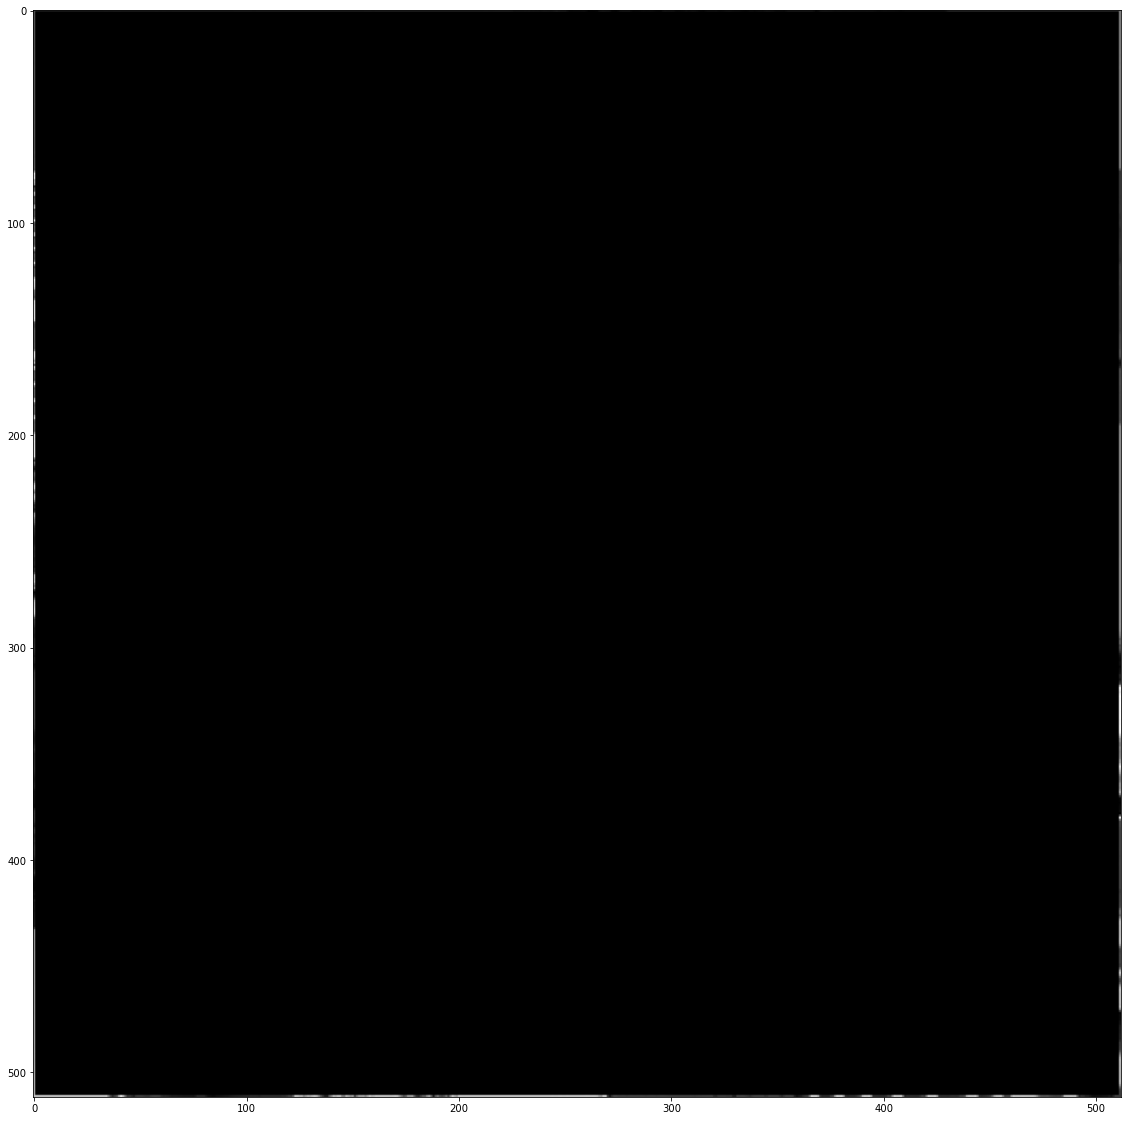

In [70]:
plt.figure(figsize = (20,20)) # source: https://stackoverflow.com/a/10541486
plt.gray()
plt.imshow(i_transformed)
plt.show()